In [40]:
import glob
import random
import re


from Bio import SeqIO
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cd ~/code/nf-core/kmermaid/results_pacbio_by_celltype/

/Users/olgabot/code/nf-core/kmermaid/results_pacbio_by_celltype


In [3]:
ls -lha

total 480
drwxr-xr-x   40 olgabot  staff   1.3K Oct  9 22:29 ./
drwxr-xr-x   56 olgabot  staff   1.8K Oct  9 22:27 ../
drwxr-xr-x   14 olgabot  staff   448B Oct  9 22:29 pipeline_info/
-rw-r--r--    1 olgabot  staff   3.6K Oct  9 22:28 similarities_molecule-dayhoff_ksize-21_log2sketchsize-10.csv
-rw-r--r--    1 olgabot  staff   4.1K Oct  9 22:28 similarities_molecule-dayhoff_ksize-21_log2sketchsize-12.csv
-rw-r--r--    1 olgabot  staff   4.7K Oct  9 22:28 similarities_molecule-dayhoff_ksize-21_log2sketchsize-14.csv
-rw-r--r--    1 olgabot  staff   3.6K Oct  9 22:28 similarities_molecule-dayhoff_ksize-27_log2sketchsize-10.csv
-rw-r--r--    1 olgabot  staff   4.1K Oct  9 22:28 similarities_molecule-dayhoff_ksize-27_log2sketchsize-12.csv
-rw-r--r--    1 olgabot  staff   4.6K Oct  9 22:28 similarities_molecule-dayhoff_ksize-27_log2sketchsize-14.csv
-rw-r--r--    1 olgabot  staff   3.6K Oct  9 22:28 similarities_molecule-dayhoff_ksize-33_log2sketchsize-10.csv
-rw-r--r--    1 olgabot  staff 

In [8]:
df = pd.read_csv("similarities_molecule-dayhoff_ksize-21_log2sketchsize-10.csv")
df.head()

,orangutan_cell3.Mix,all_chimp.Fibroblast,all_human.Choroid,all_chimp.Choroid,all_chimp.Neurons,all_human.Astro,orangutan_cell3.Unknown,all_chimp.Cycling,all_chimp.Unknown,all_human.Outlier,orangutan_cell3.CellCycle,all_human.Neuron,all_chimp.Astrocytes,all_human.Mito,all_human.G2M,orangutan_cell3.Astro,all_human.Prog
0,1.000000,0.841797,0.842773,0.837891,0.833008,0.825195,0.821289,0.834961,0.815430,0.843750,0.650391,0.831055,0.831055,0.835938,0.833984,0.847656,0.847656
1,0.841797,1.000000,0.899414,0.907227,0.895508,0.883789,0.802734,0.884766,0.890625,0.887695,0.616211,0.893555,0.905273,0.862305,0.895508,0.873047,0.850586
2,0.842773,0.899414,1.000000,0.933594,0.907227,0.932617,0.779297,0.892578,0.926758,0.915039,0.581055,0.925781,0.931641,0.868164,0.934570,0.866211,0.844727
3,0.837891,0.907227,0.933594,1.000000,0.923828,0.942383,0.778320,0.909180,0.947266,0.916016,0.575195,0.931641,0.946289,0.869141,0.936523,0.871094,0.843750
4,0.833008,0.895508,0.907227,0.923828,1.000000,0.909180,0.785156,0.892578,0.914062,0.905273,0.594727,0.913086,0.914062,0.868164,0.910156,0.865234,0.843750


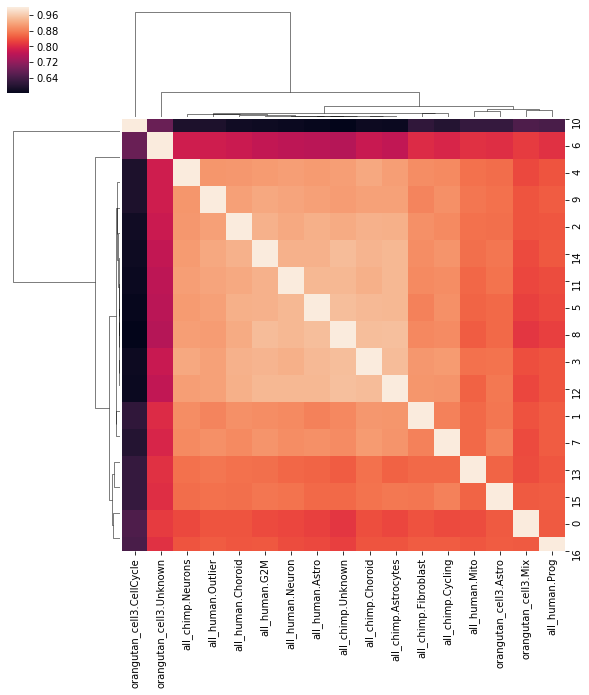

In [9]:
sns.clustermap(df, metric='cosine')

/Users/olgabot/anaconda/envs/kh-tools/lib/python3.7/site-packages/seaborn/matrix.py:771: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self.fig = plt.figure(figsize=figsize)


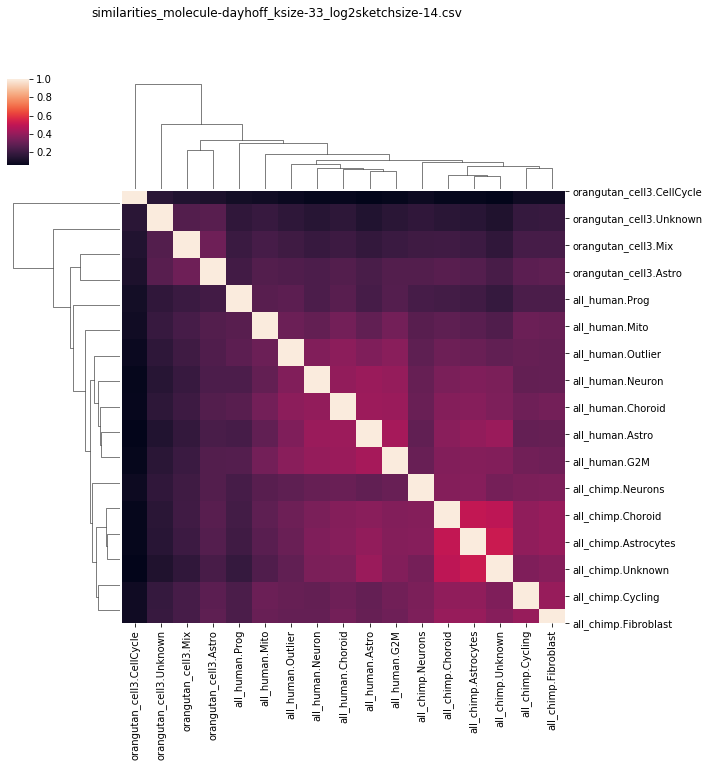

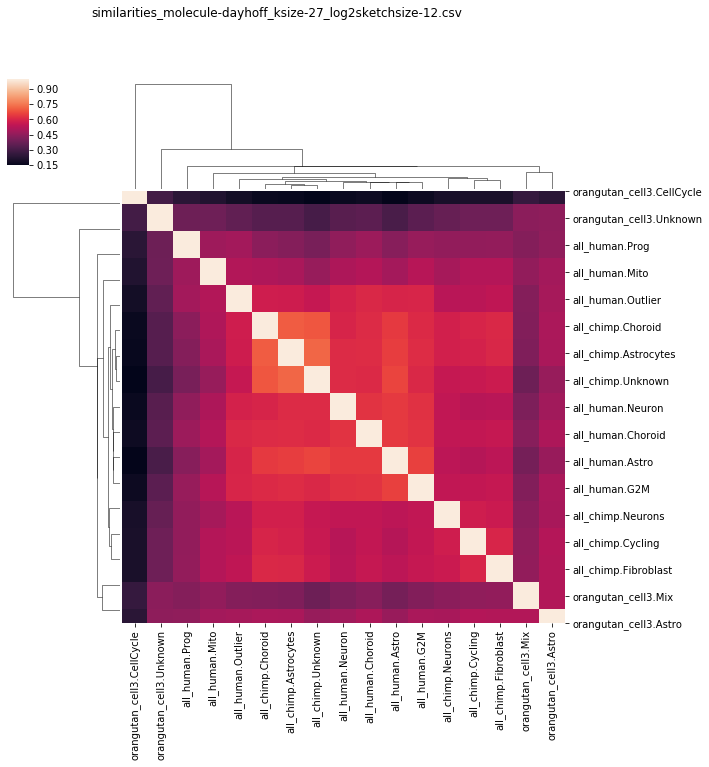

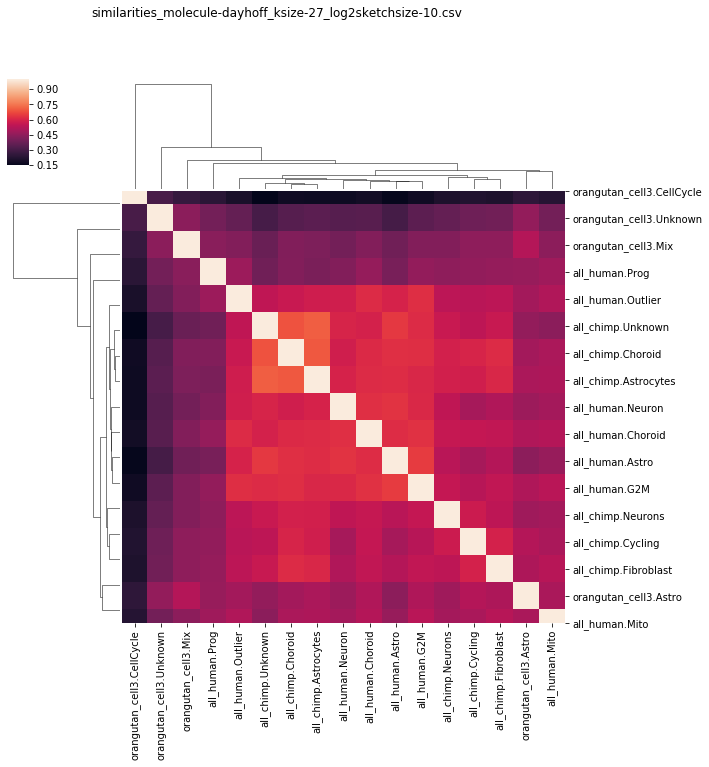

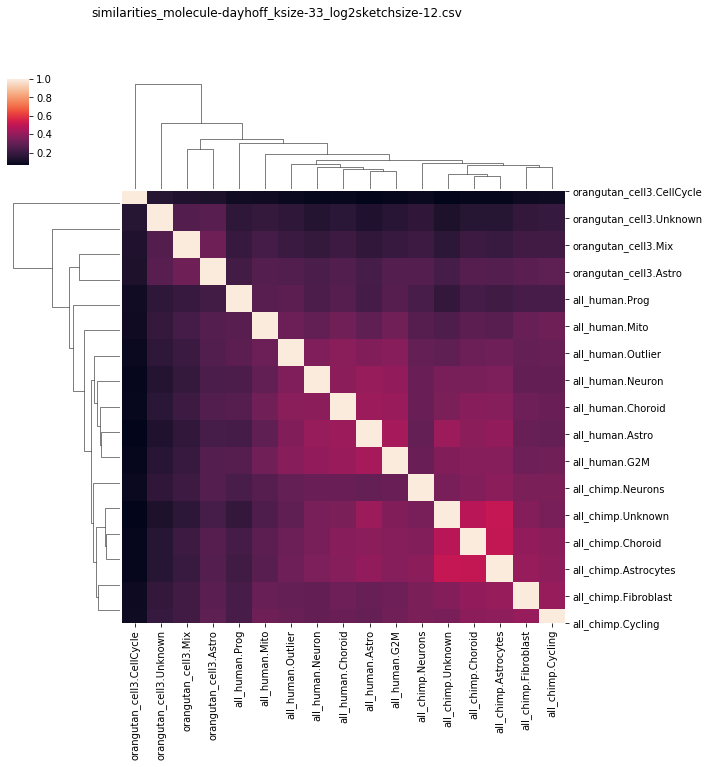

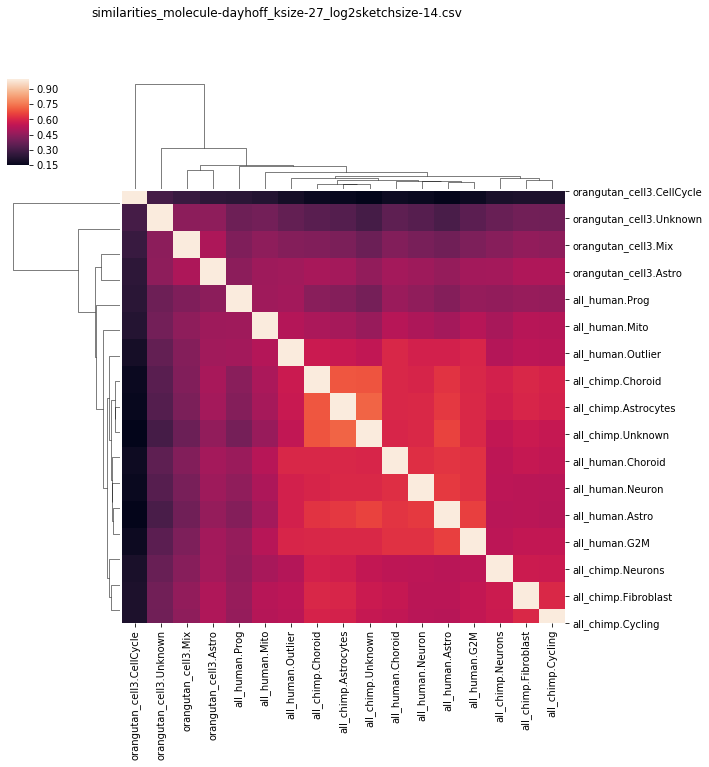

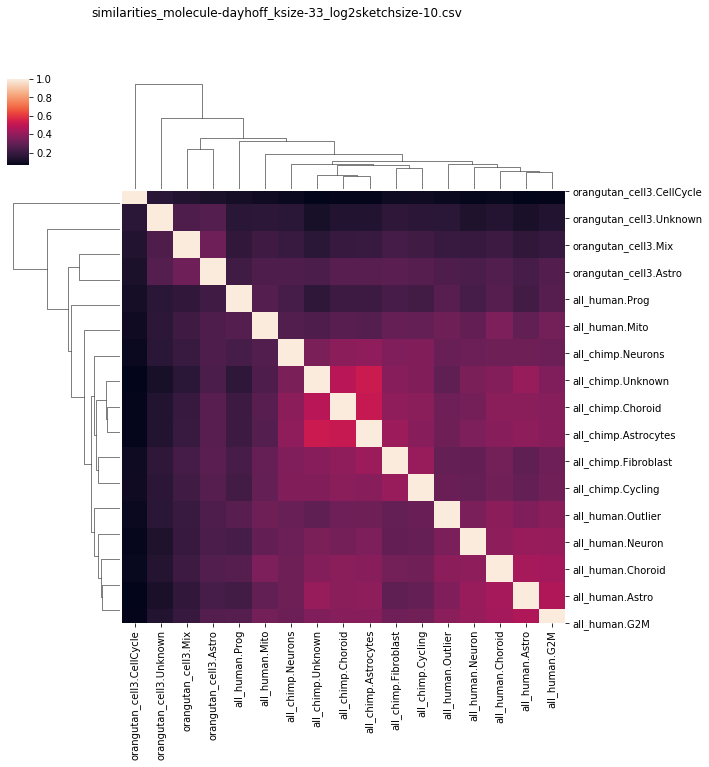

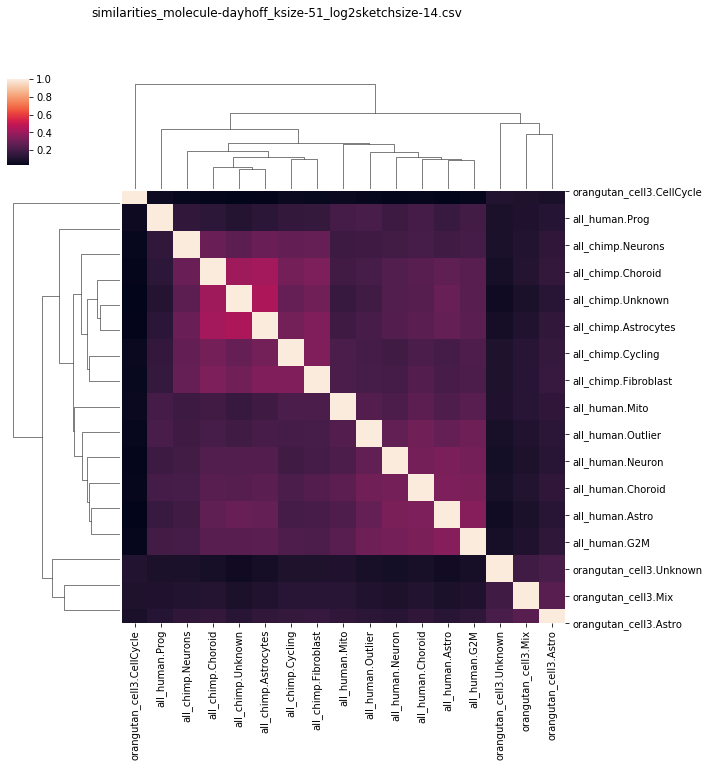

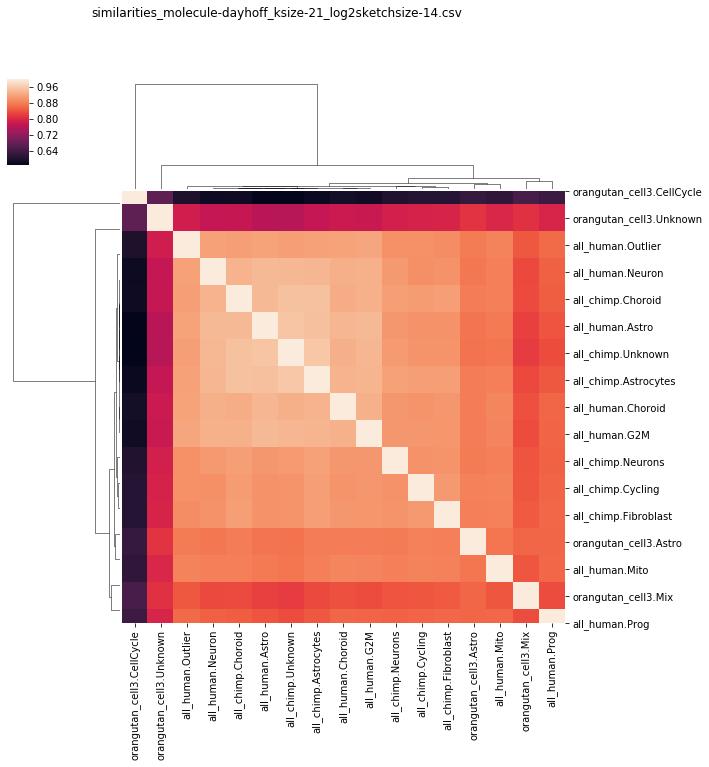

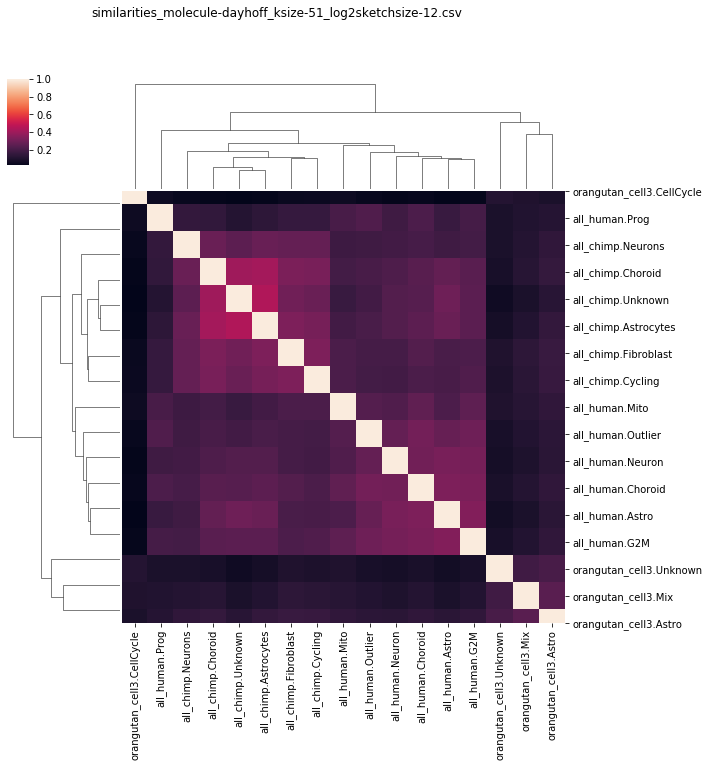

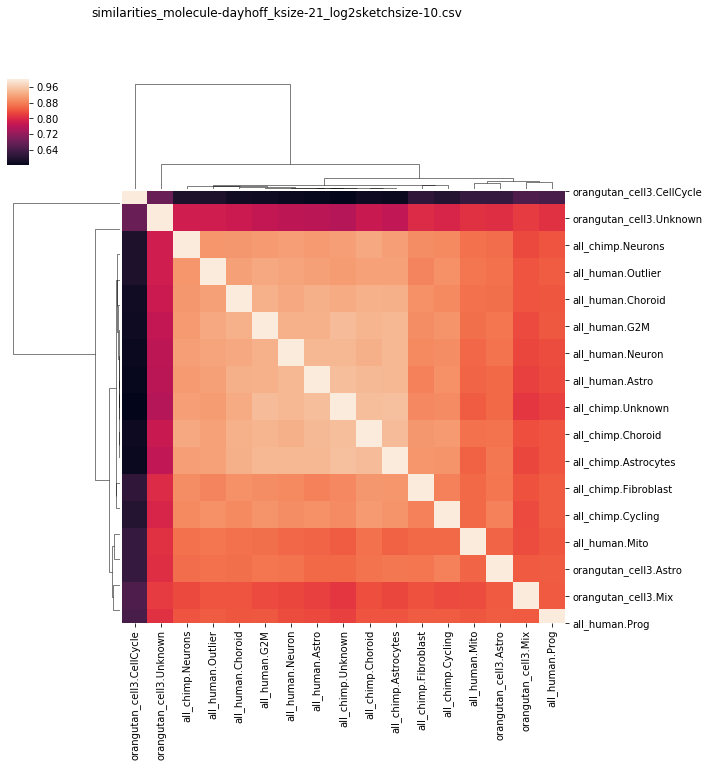

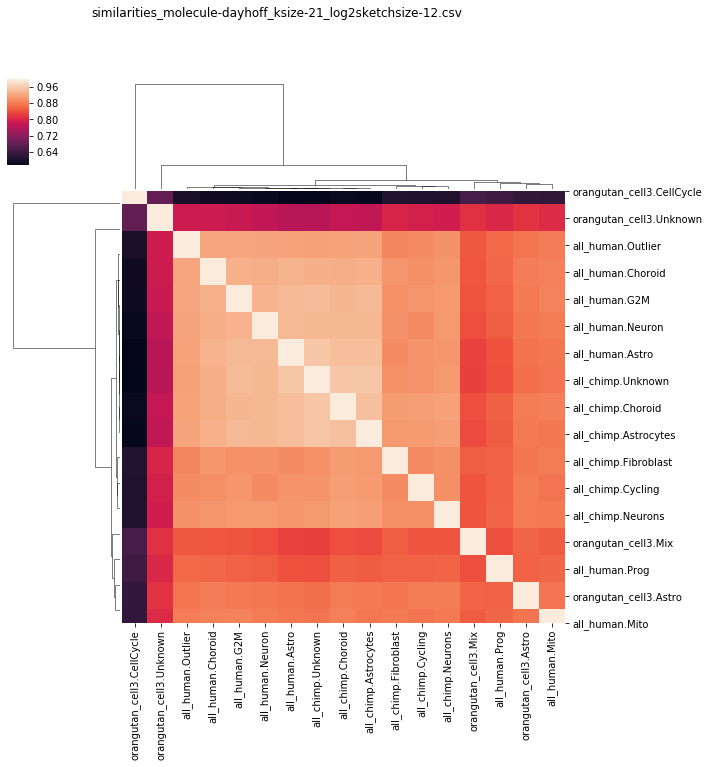

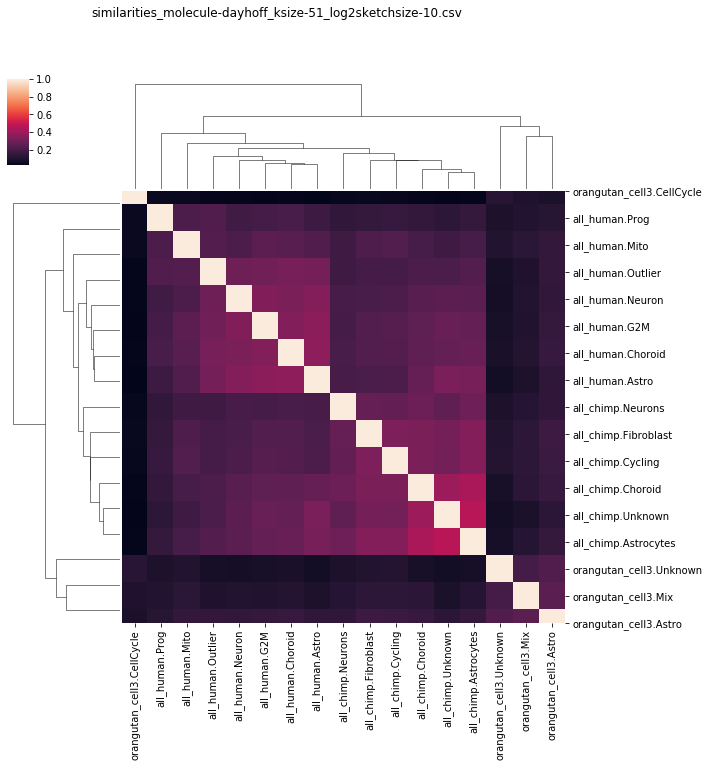

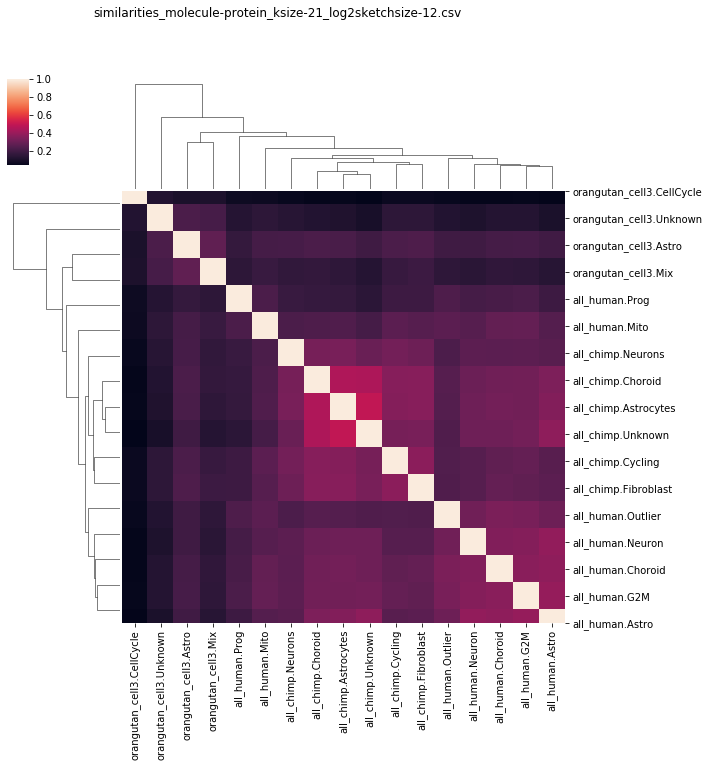

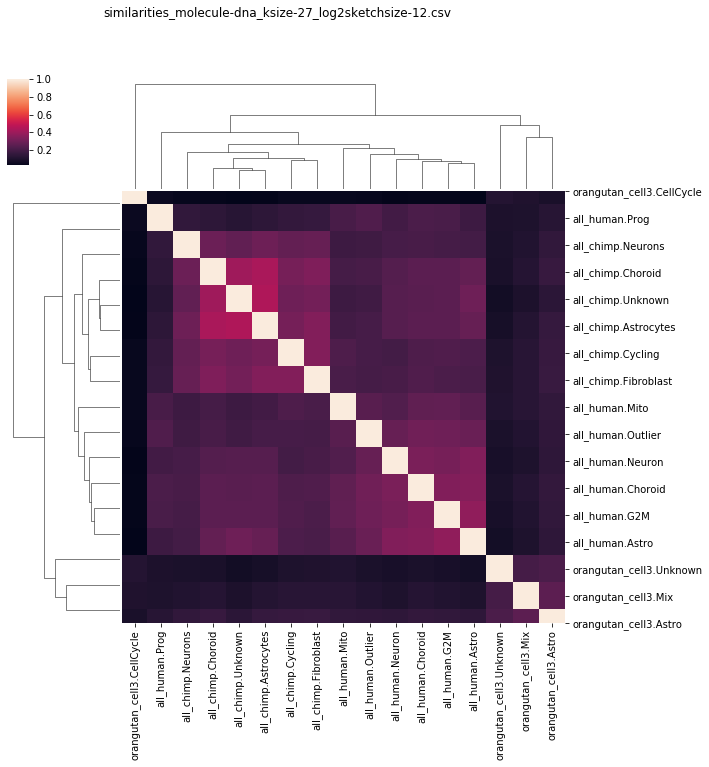

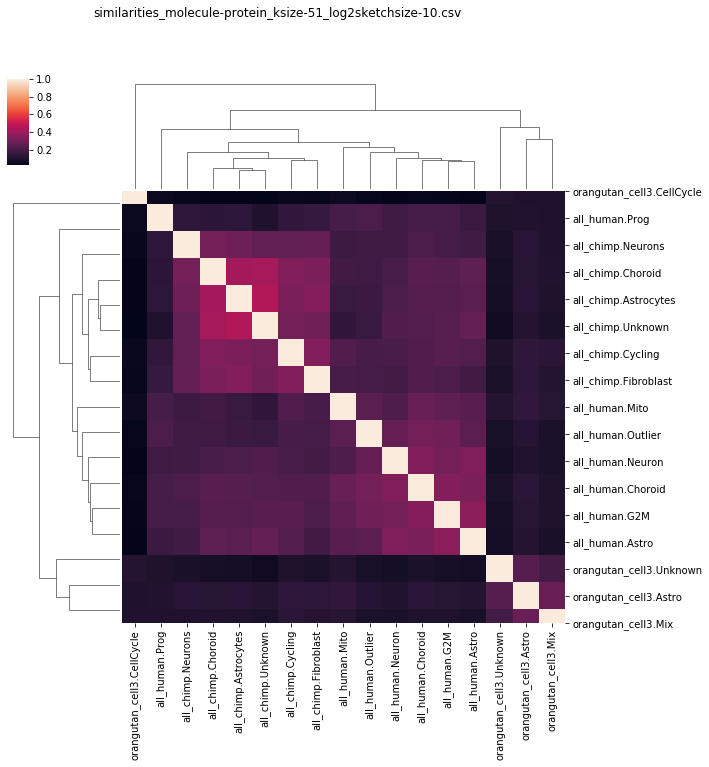

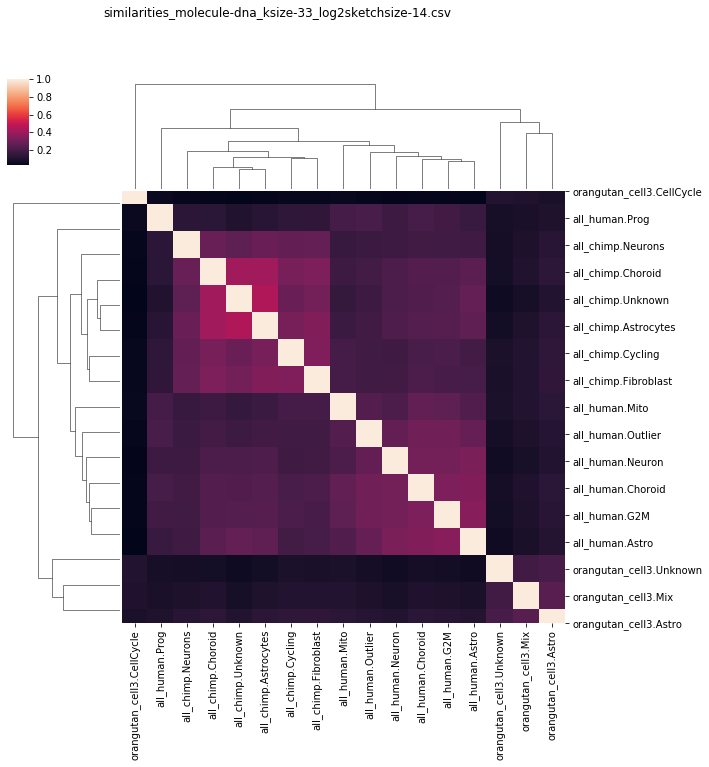

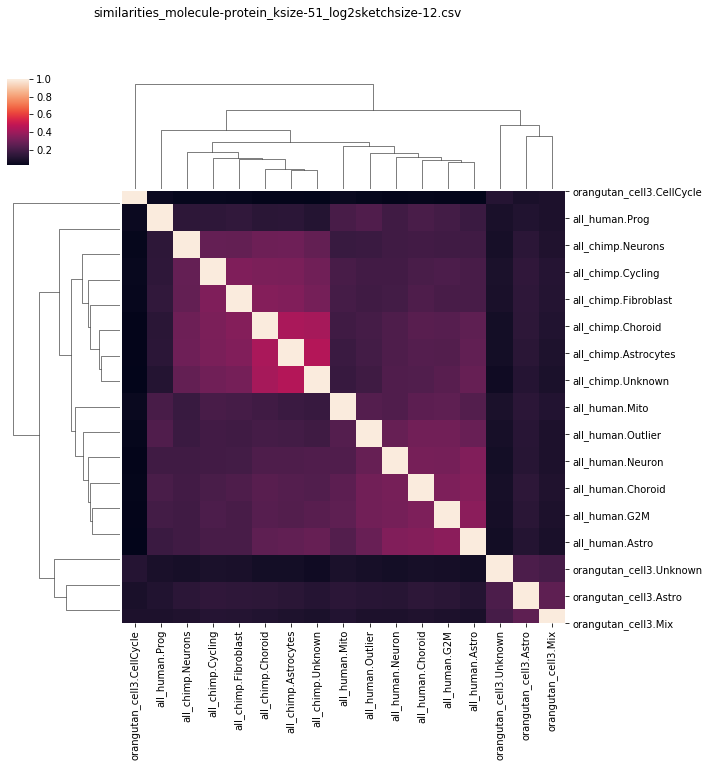

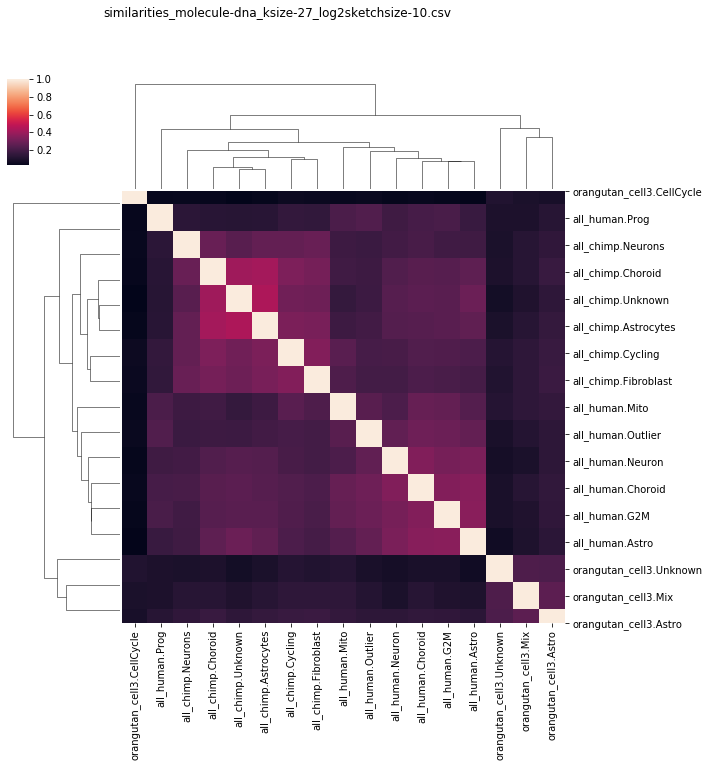

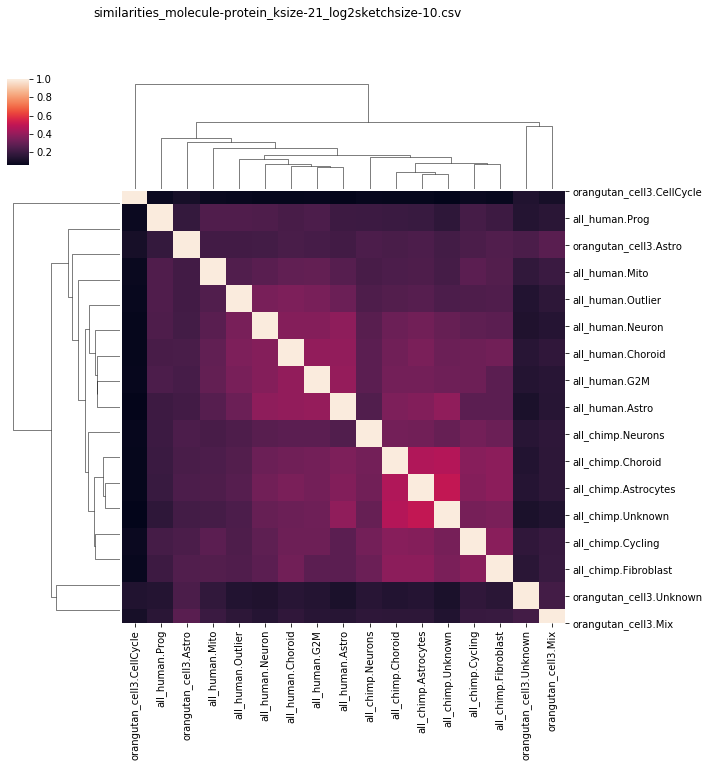

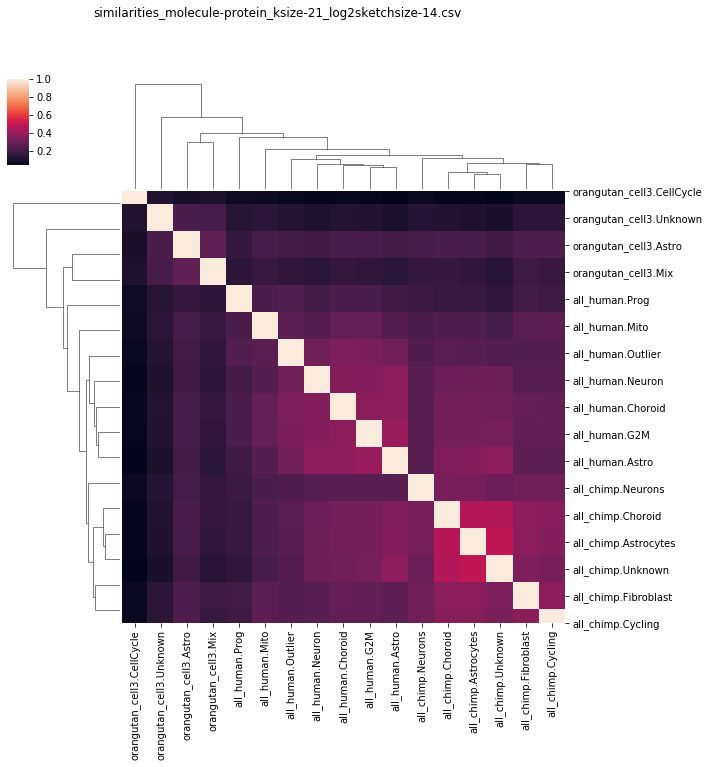

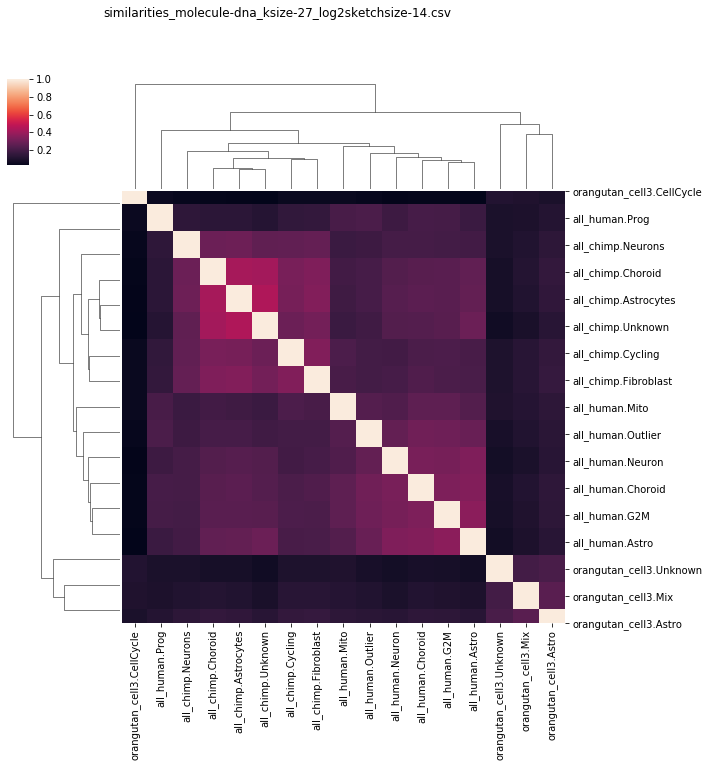

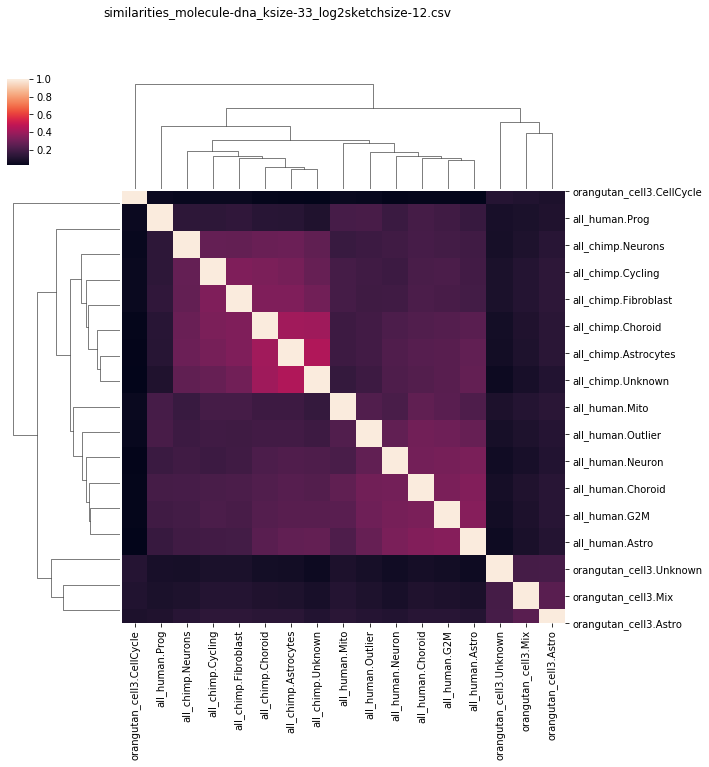

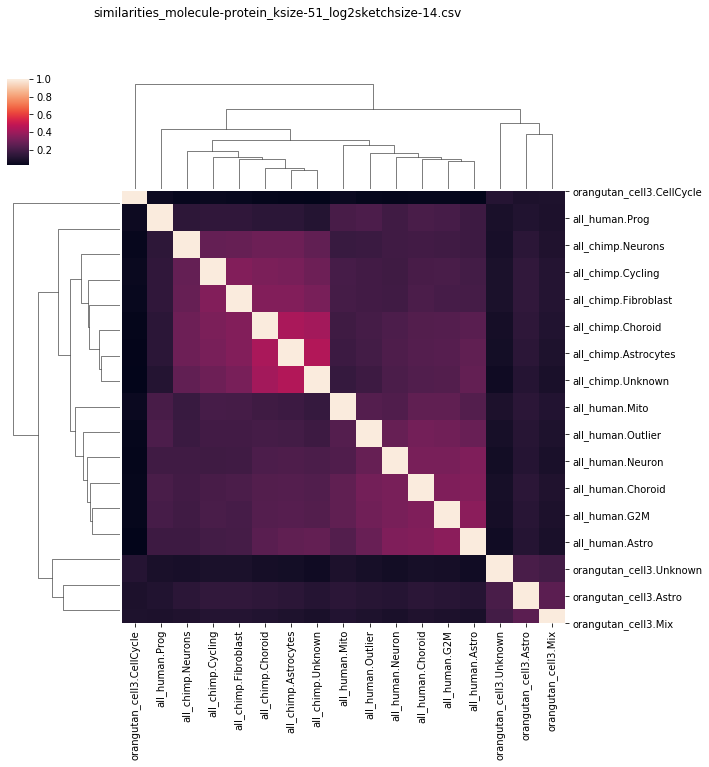

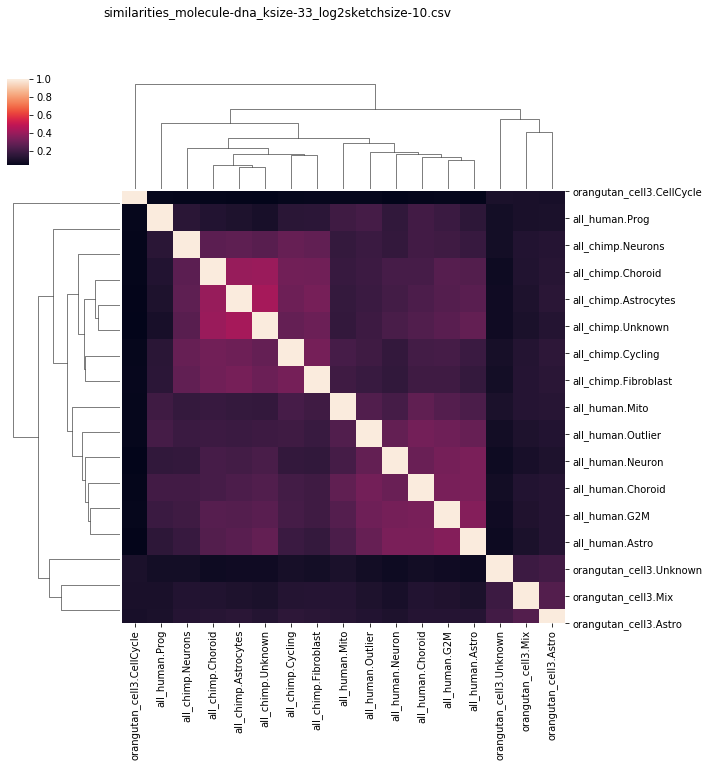

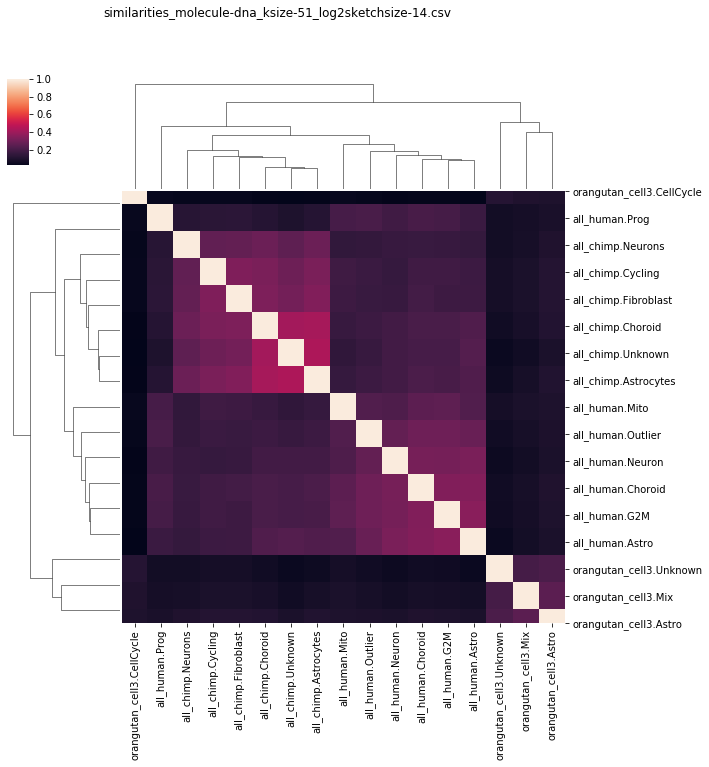

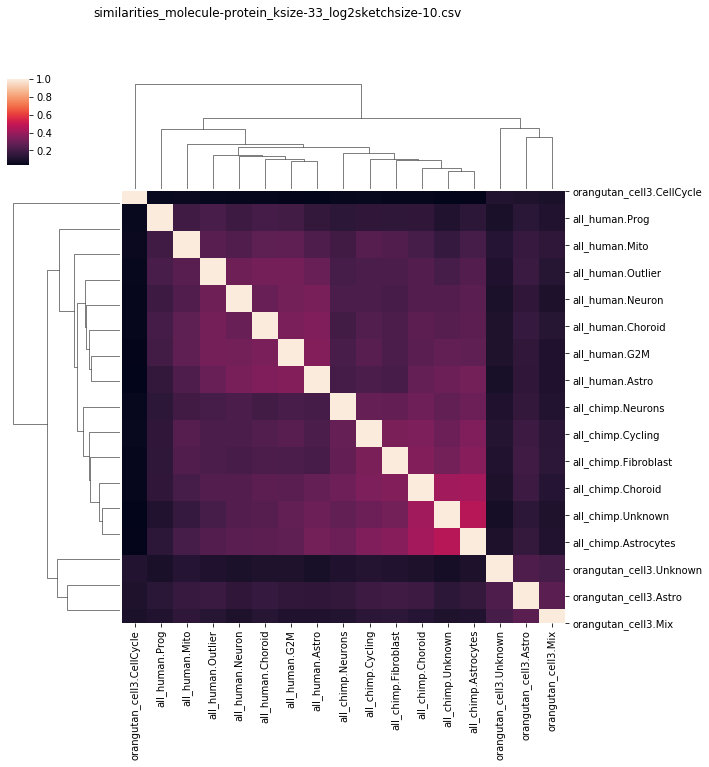

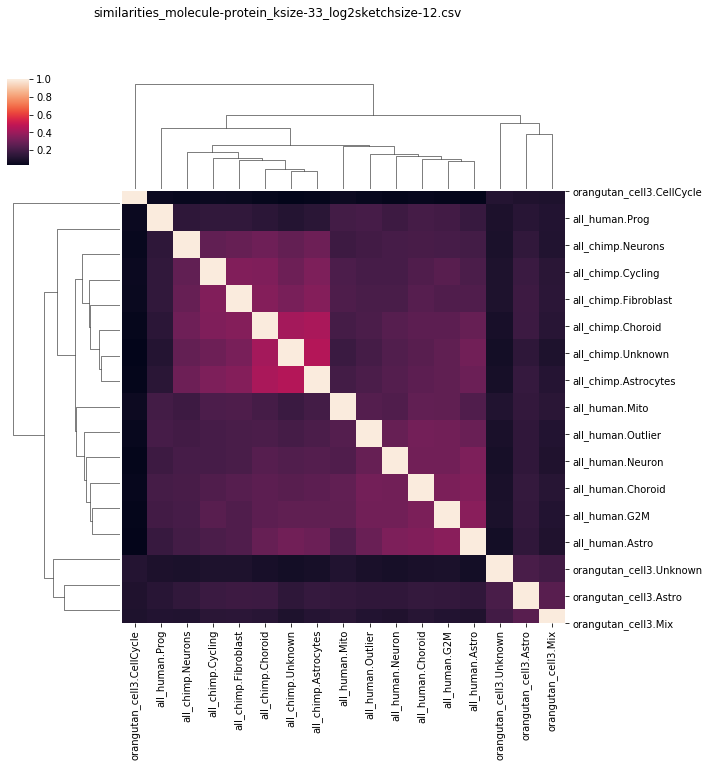

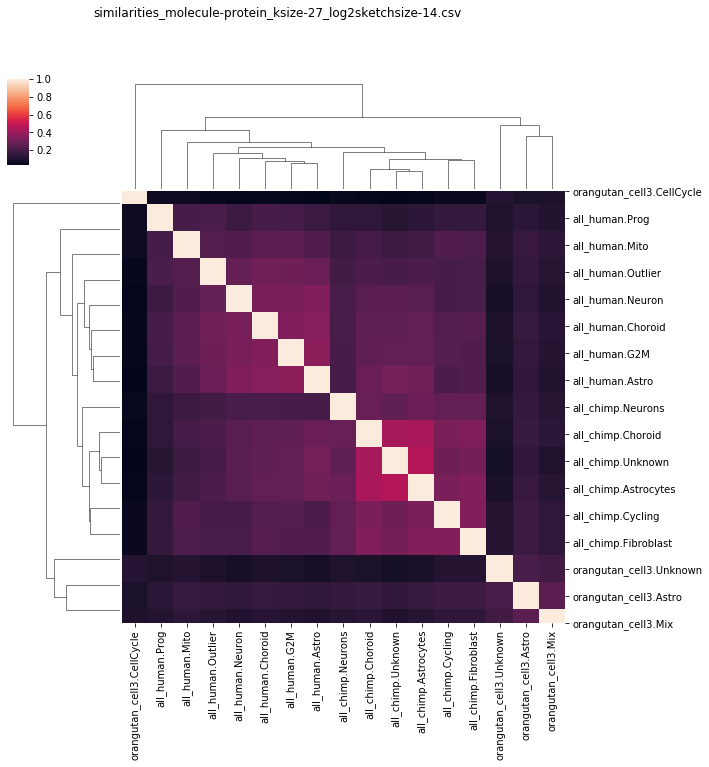

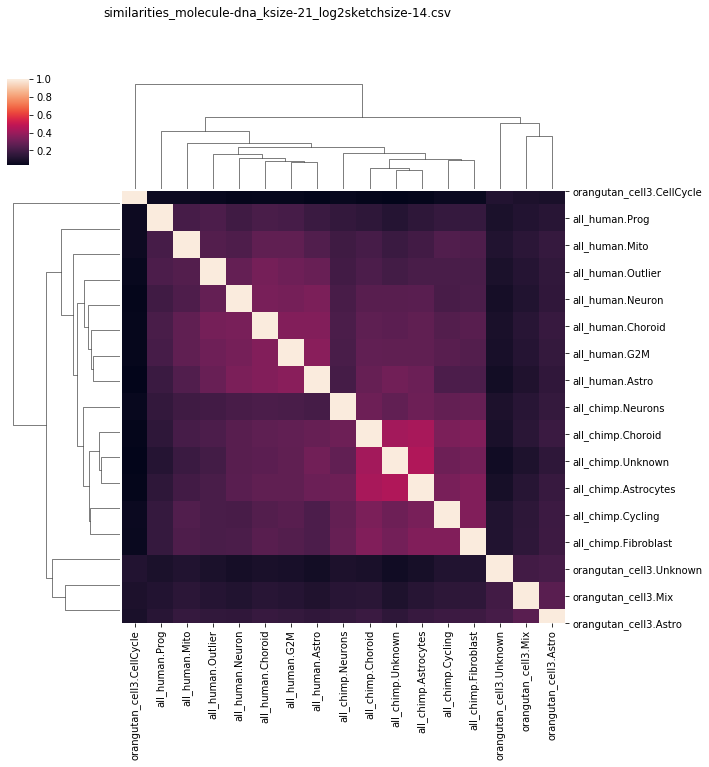

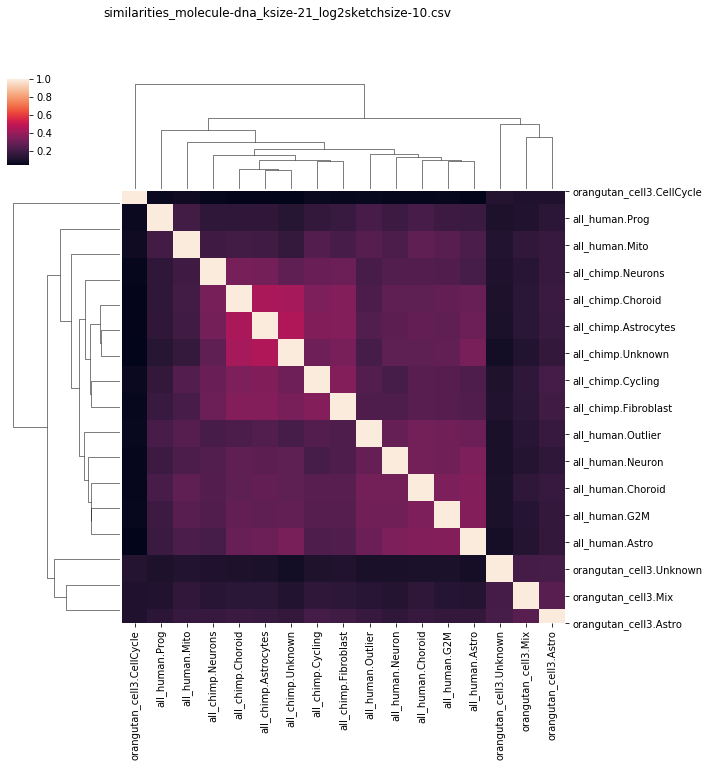

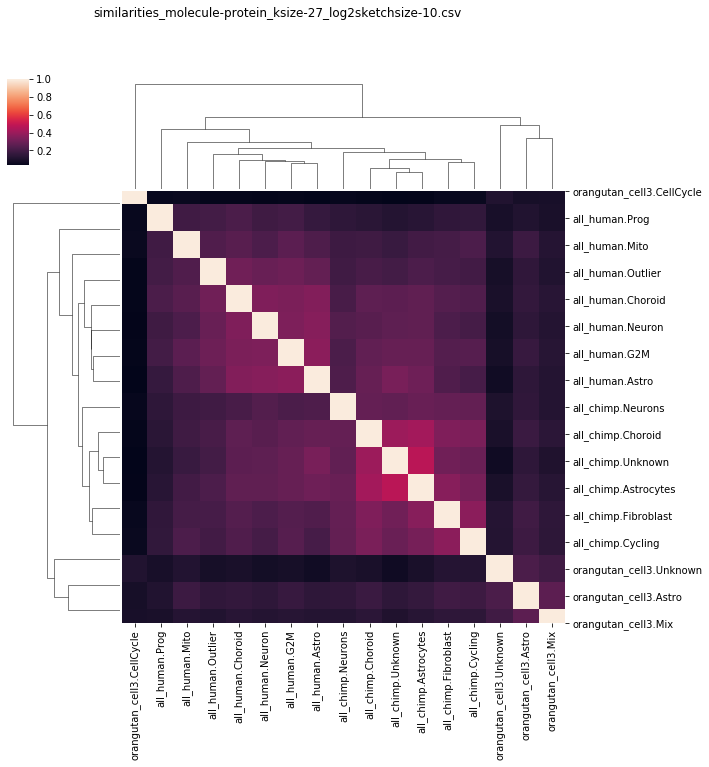

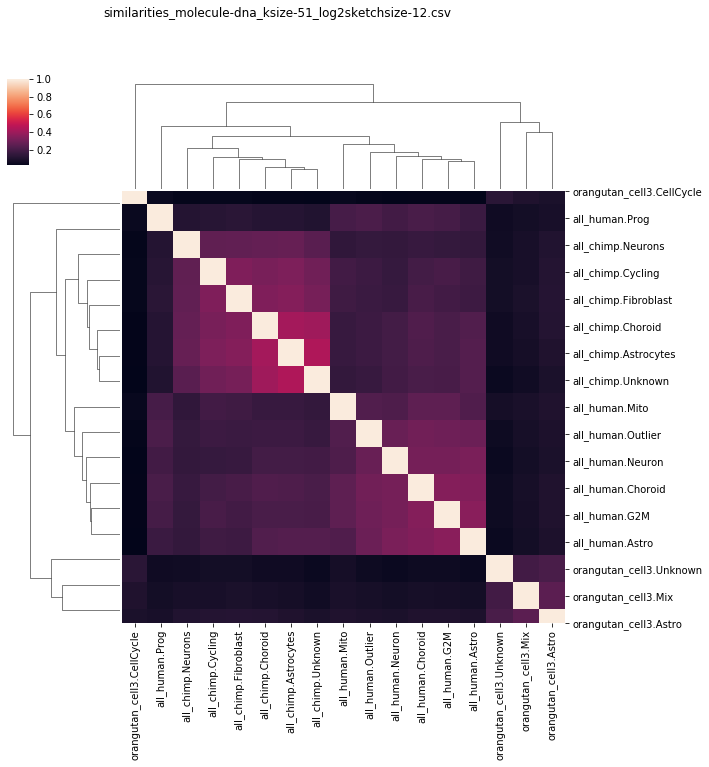

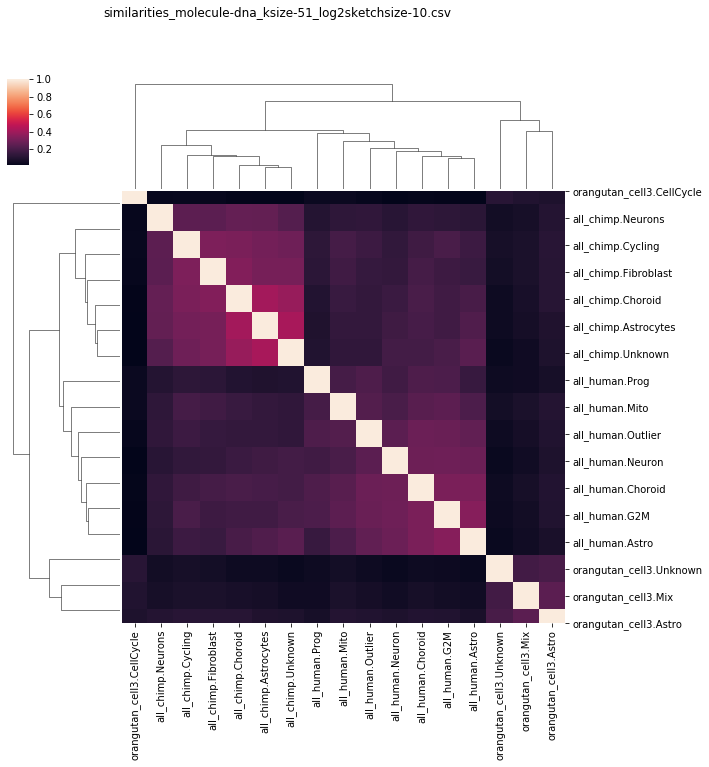

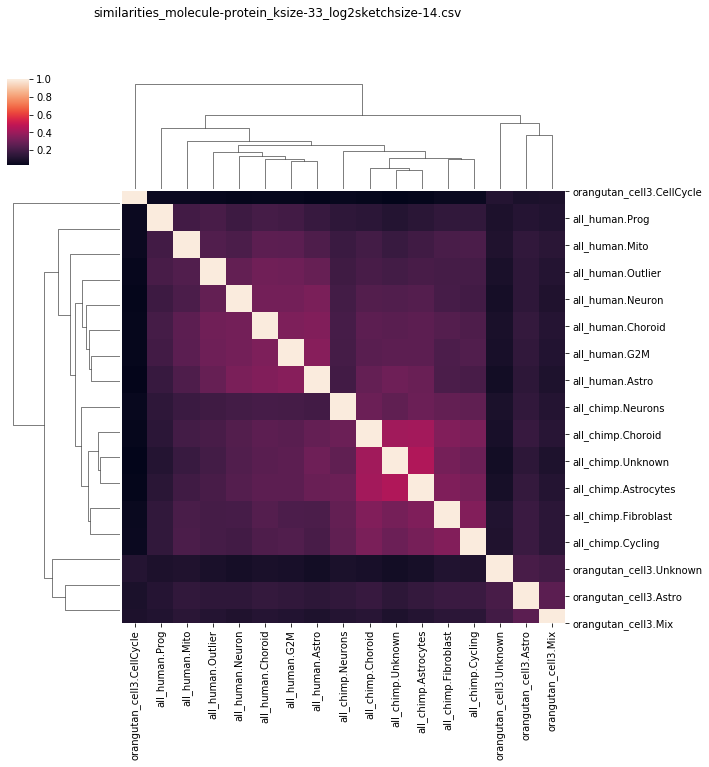

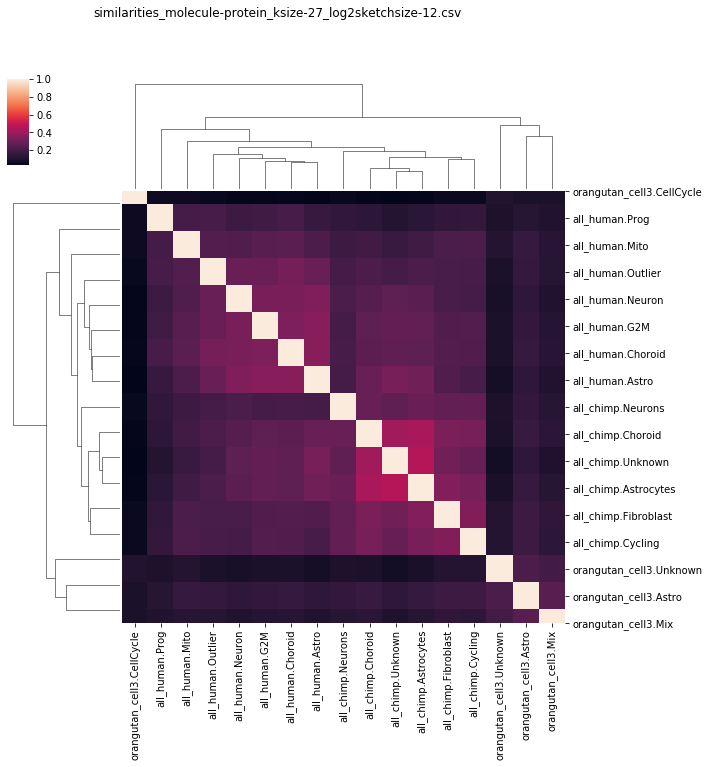

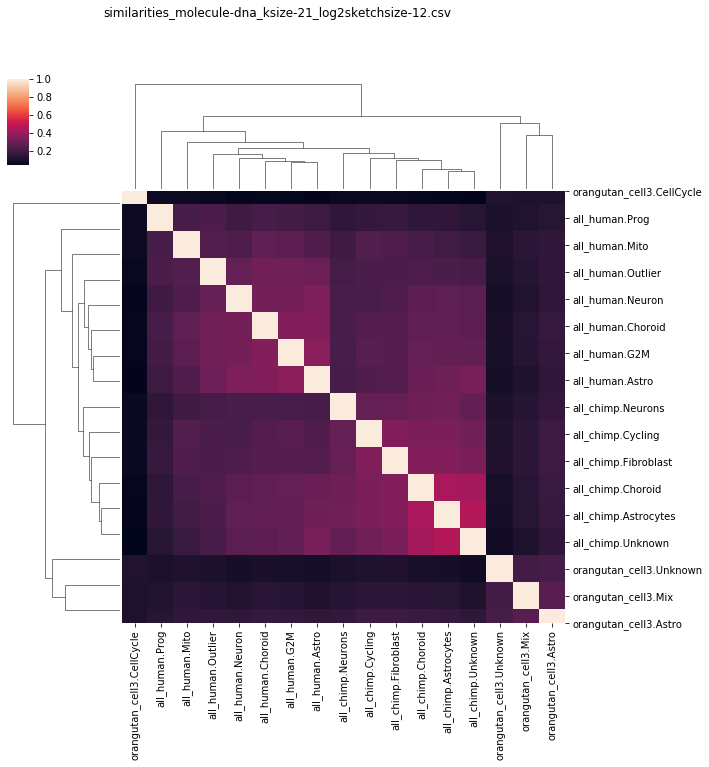

In [11]:
for csv in glob.glob("*.csv"):
    df = pd.read_csv(csv)
    df.index = df.columns
    sns.clustermap(df, metric='cosine')
    fig = plt.gcf()
    fig.suptitle(csv)

In [12]:
cd ~/Downloads/HUMAN_CHIMP_Organoid_ForOlga_Sept2019/human_ALL_by_celltype/

/Users/olgabot/Downloads/HUMAN_CHIMP_Organoid_ForOlga_Sept2019/human_ALL_by_celltype


In [13]:
! wc -l *fasta

  178936 all_human.Astro.fasta
   87214 all_human.Choroid.fasta
  104364 all_human.G2M.fasta
   42296 all_human.Mito.fasta
   80768 all_human.Neuron.fasta
   66464 all_human.Outlier.fasta
   20344 all_human.Prog.fasta
  580386 total


In [14]:
! head all_human.Neuron.fasta

>PB.1.1|WASH7P-TTTAAGCGC-GGACAGTCGTTC
GCTTCCGGGAGGGCGGCTCGCAGGCACCATGACTCCTGTGAGGATGCAGCACTCCCTGGCAGGTCAGACCTATGCCGTGCCCTTCATCCAGCCAGACCTGCGGCGAGAGGAGGCCGTCCAGCAGATGGCGGATGCCCTGCAGTACCTGCAGAAGGTCTCTGGAGACATCTTCAGCAGTGAGAGCGGCCTTGCTGCGGCCAAAGAACATGGAAAAGCATGAGTGGGGTGATGTGCCTTAAAGCATCAGACACTTGGGCCTCGGGCATCAggagccagccacagggatgtctggggaaatggcgttccatgagatgcaagcacacaagaatgcacttggcacatctggggaacagcaggcagctgatatcactgggcccaccccgcaccagggaggatggaagcagGATCTCCCAGCAGGTAGAGCAGAGCCGGAGCCAGGTGCAGGCCATTGGAGAGAAGGTCTCCTTGGCCCAGGCCAAGATTGAGAAGATCAAGGGCAGCAAGAAGGCCATCAAGGTGTTCTCCAGTGCCAAGTACCCTGCTCCAGGGCGCCTGCAGGAATATGGCTCCATCTTCACGGGCGCCCAGGACCCTGGCCTGCAGAGACGCCCCCGCCACAGGATCCAGAGCAAGCACCGCCCCCTGGACGAGCGGGCCCTGCAGGAGAAGCTGAAGGACTTTCCTGTGTGCGTGAGCACCAAGCCGGAGCCCGAGGACGATGCAGAAGAGGGACTTGGGGGTCTTCCCAGCAACATCAGCTCTGTCAGCTCCTTGCTGCTCTTCAACACCACCGAGAACCTGTAGAAGAAGTATGTCTTCCTGGACCCCCTGGCTGGTGCTGTAACAAAGACCCATGTGATGCTGGGGGCAGAGACAGAGGAGAAGCTGTTTGATGCCCCCTTGTCCATCAGCAAGAGAGAGCAGCTGGAACAGCAGGTCCCAGAGAACTACTTCTATGTGCC

In [ ]:
from khtools.compare

In [46]:
def get_longest_translation(record):
    matches = re.finditer("ATG", str(record.seq.upper()))
    longest_translation = None
    for match in matches:
        translation = record.seq[match.start():].translate(to_stop=True)
        if longest_translation is None or len(translation) > len(longest_translation):
            longest_translation = translation
    return longest_translation

random.seed(0)
records = list(SeqIO.parse('all_human.Neuron.fasta', 'fasta'))
random.shuffle(records)

for i, record in zip(range(5), records):
    start = record.seq.upper().find('ATG')
    print('\n---')
    print(f'>{record.description}')
    print(str(record.seq))
    print('---')
    print('first ATG translation:\n', record.seq[start:].translate(to_stop=True))
    longest_translation = get_longest_translation(record)

    print('longest_translation:\n', longest_translation)


---
>PB.6797.3|GABARAPL1-AGCGTGCGC-GCACCGGGCGGC
ACAGCCCGACGCGCCACCCAGCTGTTTTTGTGCTCCCAGCTCTAGCGAAAAGCCGCCGGTATTTCTCCATCTGGCTCTCCTCTACCTCCAGGCAGGCTCACCCGAGATCCCCGCCCCGAACCCCCCCTGCACACTCGGCCCAGCGCTGTTGCCCCCGGAGCGGACGTTTCTGCAGCTATTCTGAGCACACCTTGACGTCGGCTGAGGGAGCGGGACAGGGTCAGCGGCGAAGGAGGCAGGCCCCGCGCGGGGATCTCGGAAGCCCTGCGGTGCATCATGAAGTTCCAGTACAAGGAGGACCATCCCTTTGAGTATCGGAAAAAGGAAGGAGAAAAGATCCGGAAGAAATATCCGGACAGGGTCCCCGTGATTGTAGAGAAGGCTCCAAAAGCCAGGGTGCCTGATCTGGACAAGAGGAAGTACCTAGTGCCCTCTGACCTTACTGTTGGCCAGTTCTACTTCTTAATCCGGAAGAGAATCCACCTGAGACCTGAGGACGCCTTATTCTTCTTTGTCAACAACACCATCCCTCCCACCAGTGCTACCATGGGCCAACTGTATGAGGACAATCATGAGGAAGACTATTTTCTGTATGTGGCCTACAGTGATGAGAGTGTCTATGGGAAATGAGTGGTTGGAAGCCCAGCAGATGGGAGCACCTGGACTTGGGGGTAGGGGAGGGGTGTGTGTGCGCGACATGGGGAAAGAGGGTGGCTCCCACCGCAAGGAGACAGAAGGTGAAGACATCTAGAAACATTACACCACACACACCGTCATCACATTTTCACATGCTCAATTGATATTTTTTGCTGCTTCCTCGGCCCAGGGAGAAAGCATGTCAGGACAGAGCTGTTGGATTGGCTTTGATAGAGGAATGGGGATGATGTAAGTTTACAGTATTCCTGGGGTTTAATTGTTGTGCAGTTTCATAGATGGGTCAGGAGGTGGACA

In [ ]:
record.seq.translate()

In [ ]:
record.seq.upper().find('ATG')

In [28]:
re.finditer("ATG", str(record.seq.upper()))

In [22]:
record.seq.upper().find('ATG')

35